In [2]:
import seaborn as sns 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score

In [3]:
df = pd.read_csv("spam.csv", encoding="utf-8", encoding_errors="ignore", )

DATA CLEANING

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)

In [7]:
k = df[df.duplicated(subset=["v2"], keep=False)].index
df["v1"].iloc[k].value_counts()

v1
ham     503
spam    183
Name: count, dtype: int64

In [8]:
df["v1"].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [10]:
df.rename(columns={"v1": "target", "v2": "message"}, inplace=True)
df.drop_duplicates(keep="first", inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
df["target"] = encoder.fit_transform(df["target"])

In [14]:
df

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will _ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA --- Exploratory Data Analysis

In [15]:
df["target"].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

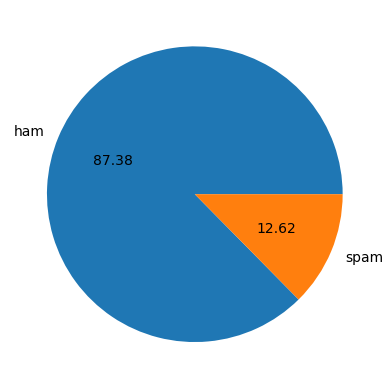

In [16]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [17]:
!pip install nltk
import nltk
nltk.data.path.append('C:/nltk_data')
nltk.download('punkt', download_dir='C:/nltk_data')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [18]:

df["num_of_characters"] = df.message.apply(len)
df["num_of_words"] = df.message.apply(lambda x: len(nltk.word_tokenize(x)))
df["num_of_sent"] = df.message.apply(lambda x: len(nltk.sent_tokenize(x)))


In [67]:
df["message"][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [20]:
df[["num_of_characters", "num_of_words", "num_of_sent"]].describe()

,num_of_characters,num_of_words,num_of_sent
count,5168.000000,5168.000000,5168.000000
mean,78.759481,18.441176,1.966331
std,58.104099,13.327587,1.449367
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,116.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Figure size 1200x600 with 0 Axes>

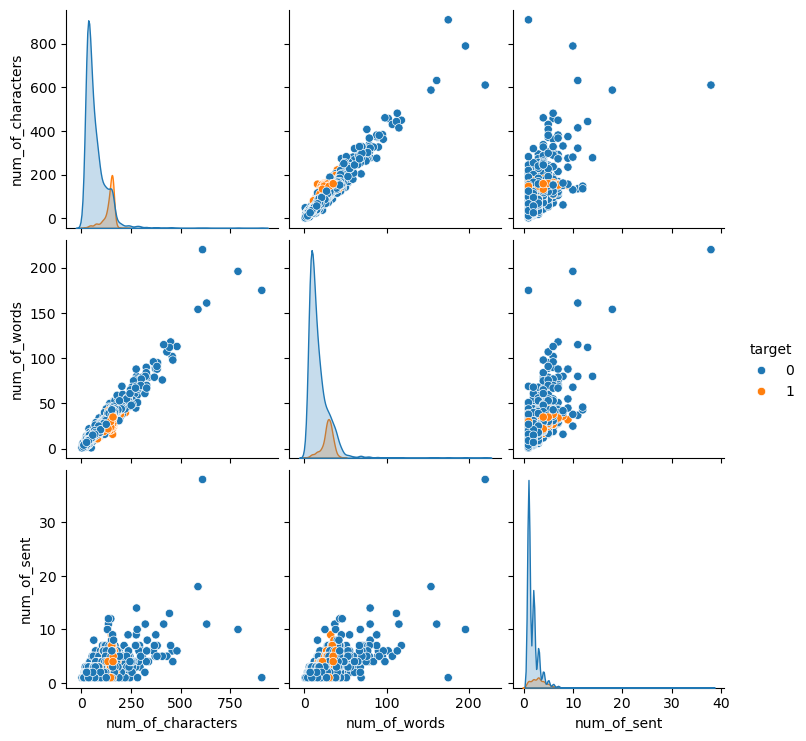

In [21]:

plt.figure(figsize=(12, 6))
sns.pairplot(df, hue="target")
plt.show()

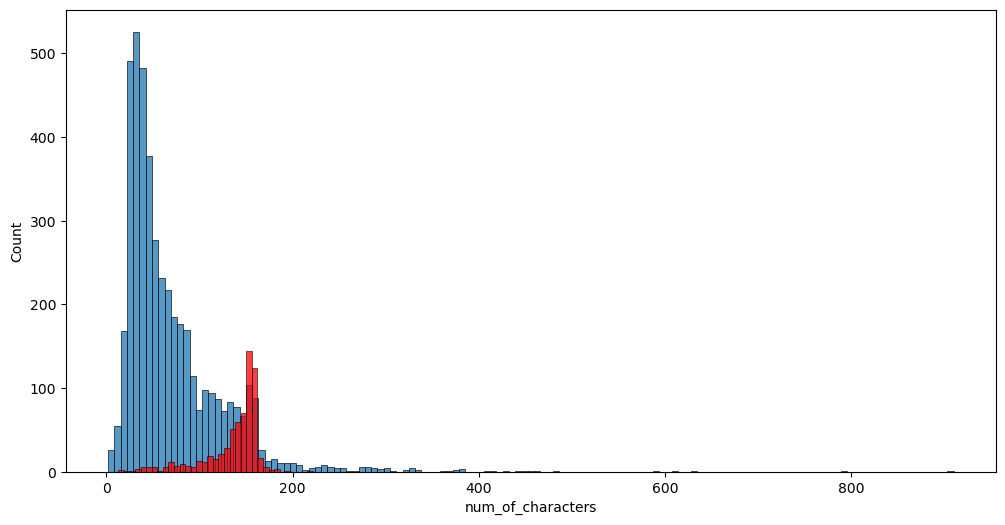

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_of_characters'])
sns.histplot(df[df['target'] == 1]['num_of_characters'],color='red')
plt.show()

<Axes: >

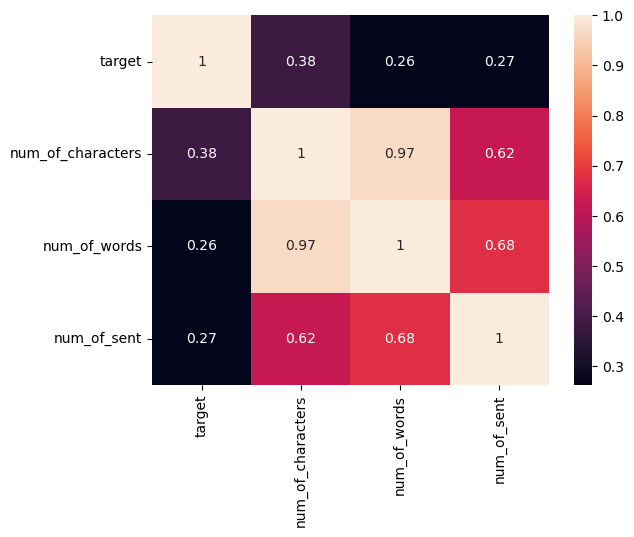

In [23]:
sns.heatmap(df.drop("message", axis=1).corr(),annot=True)

Data preprocessing
    -Lower case
    -Tokenization
    -Removing special characters
    -Removing stop words and punctuation
    -Stemming

In [24]:
nltk.word_tokenize("hellowine, heybhye hey %#2")

['hellowine', ',', 'heybhye', 'hey', '%', '#', '2']

In [25]:
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sanjay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [26]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("love lover loving lovely")

'love lover loving lov'

In [58]:
def transform_test(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y =[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

with open("transform.pkl", "wb") as f:
    pickle.dump(transform_test, f)

In [28]:
transform_test(df.message[1])

'ok lar joke wif u oni'

In [29]:
df["transformed_text"] = df.message.apply(transform_test)

In [30]:
df

,target,message,num_of_characters,num_of_words,num_of_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,0,Will _ b going to esplanade fr home?,36,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [31]:
import wordcloud
from wordcloud import WordCloud

In [32]:
wc = WordCloud(width=400,height=200,background_color="white", min_font_size=2)
spam_words = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

In [33]:
wc = WordCloud(width=400,height=200,background_color="white", min_font_size=2)
ham_words = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

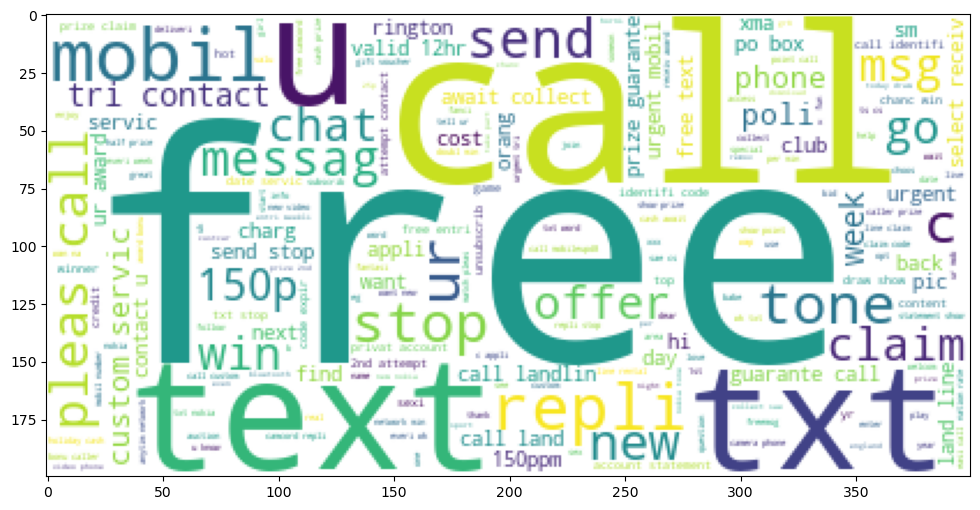

In [34]:
plt.figure(figsize=(15,6))
plt.imshow(spam_words)

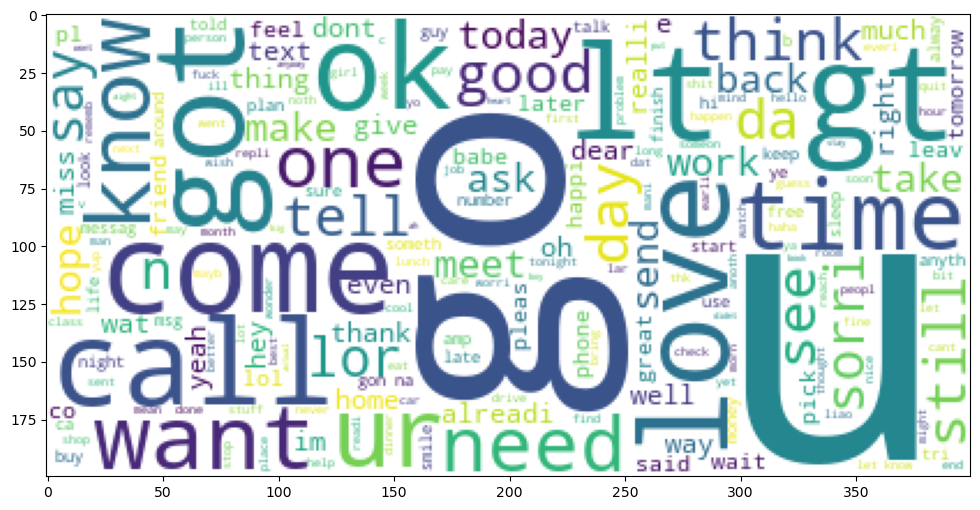

In [35]:
plt.figure(figsize=(12,6))
plt.imshow(ham_words)

In [36]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for text in msg.split():
        spam_corpus.append(text)

In [37]:
len(spam_corpus)

10106

In [38]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 102),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 47),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

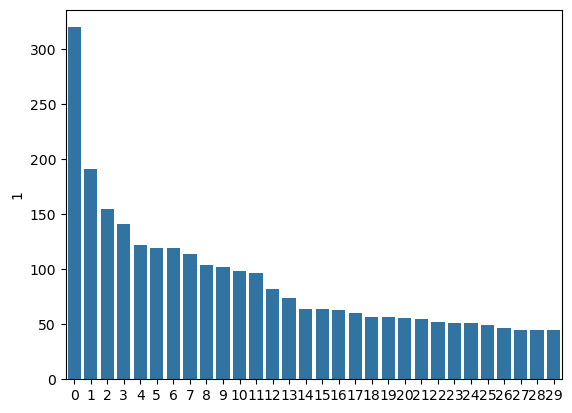

In [39]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='horizontal')
plt.show()

In [40]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
from collections import Counter
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [42]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [61]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

import pickle 
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))

In [44]:
X.shape

(5168, 5000)

In [45]:
y = df["target"]

In [46]:
y.value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
sm = SMOTE()
X_sample, y_sample =  sm.fit_resample(X, y)

In [49]:
X_sample.shape

(9032, 5000)

In [50]:
y_sample.value_counts()

target
0    4516
1    4516
Name: count, dtype: int64

In [51]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=2, test_size=0.2)
X_train_sample, X_test_sample, y_train_sample, y_test_sample=train_test_split(X_sample, y_sample, random_state=0, test_size=0.2)

In [52]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.model_selection import cross_val_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()



In [63]:
bnb.fit(X_train_sample, y_train_sample)
pickle.dump(bnb, open("model.pkl", "wb"))

In [ ]:

print(np.mean(cross_val_score(gnb, X_train_sample, y_train_sample, cv=5)))
print(np.mean(cross_val_score(mnb, X_train_sample, y_train_sample, cv=5)))
print(np.mean(cross_val_score(bnb, X_train_sample, y_train_sample, cv=5)))

In [ ]:
print(np.mean(cross_val_score(gnb, X_train_sample, y_train_sample,  scoring='precision_weighted')))
print(np.mean(cross_val_score(mnb, X_train_sample, y_train_sample,  scoring='precision_weighted')))
print(np.mean(cross_val_score(bnb, X_train_sample, y_train_sample, scoring='precision_weighted')))

0.9307203915201573
0.9750626881182546


In [ ]:
print(np.mean(cross_val_score(gnb, X_train, y_train, cv=5)))
print(np.mean(cross_val_score(mnb, X_train, y_train, cv=5)))
print(np.mean(cross_val_score(bnb, X_train, y_train, cv=5)))

In [ ]:
print(np.mean(cross_val_score(gnb, X_train, y_train,scoring='precision_weighted')))
print(np.mean(cross_val_score(mnb, X_train, y_train,scoring='precision_weighted')))
print(np.mean(cross_val_score(bnb, X_train, y_train,scoring='precision_weighted')))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [ ]:
def classifier(model, X, y, X_test, y_test):
    model.fit(X, y)
    y_pred = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [ ]:
knc.fit(X_train, y_train)

In [ ]:
modellist = []
accuracy_sampled_list = []
precision_sampled_list = []
accuracy = []
precision=[]

for name, model in clfs.items():
    # accuracy , precision = classifier(model, X_train, y_train, X_test, y_test)
    accuracy_sampled, precision_sampled = classifier(model, X_train_sample, y_train_sample, X_test_sample, y_test_sample)
    
    modellist.append(name)
    accuracy_sampled_list.append(np.mean(accuracy_sampled))
    precision_sampled_list.append(np.mean(precision_sampled))
    # accuracy_list.append(np.mean(accuracy))
    # precision_list.append(np.mean(precision))
    

In [ ]:
model_classification = pd.DataFrame({"model": model, "accuracy_sampled":accuracy_sampled, "precision_sampled":precision_sampled,  "accuracy":accuracy, "precision":precision})